In [13]:
print(df__1.columns)

Index(['fullVisitorId', 'channelGrouping', 'visitNumber', 'date', 'hits',
       'pageviews', 'timeOnSite', 'newVisits', 'transactionRevenue',
       'transactions', 'bounces', 'totalTransactionRevenue', 'campaign',
       'referralPath', 'medium', 'browser', 'deviceCategory', 'isMobile',
       'operatingSystem', 'continent', 'longitude', 'latitude', 'city',
       'region', 'country', 'subContinent', 'hitNumber', 'referer', 'isExit',
       'isEntrance', 'isInteraction', 'minute', 'hour', 'time', 'type',
       'dataSource', 'pagePath', 'pageTitle', 'screenName', 'exitScreenName',
       'landingScreenName', 'isFatal', 'eventAction', 'eventLabel',
       'v2ProductName', 'productListPosition', 'productListName', 'isClick',
       'isImpression', 'productQuantity', 'productPrice', 'productRevenue',
       'v2ProductCategory', 'promoId', 'promoPosition', 'promoCreative',
       'promoName', 'promoIsClick', 'action_type', 'step', 'socialNetwork',
       'hasSocialSourceReferral', 'conte

# Big Query 연동

In [1]:
# Google Cloud project ID
# pelagic-cycle-456906-g6

In [2]:
!pip install google-cloud-bigquery

In [3]:
from google.colab import auth
from google.cloud import bigquery
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Google Cloud 인증
auth.authenticate_user()
project_id = "pelagic-cycle-456906-g6"
client = bigquery.Client(project=project_id)

## 국가별 수익

In [5]:
# SQL 쿼리
query = """
SELECT
    geoNetwork.country,
    SUM(totals.totalTransactionRevenue) / 1000000 AS total_revenue
FROM
    `bigquery-public-data`.`google_analytics_sample`.`ga_sessions_20160801`
GROUP BY
    geoNetwork.country
ORDER BY
    total_revenue DESC
LIMIT 10;
"""

# 쿼리 실행 및 결과 DataFrame으로 저장
df_1 = client.query(query).to_dataframe()

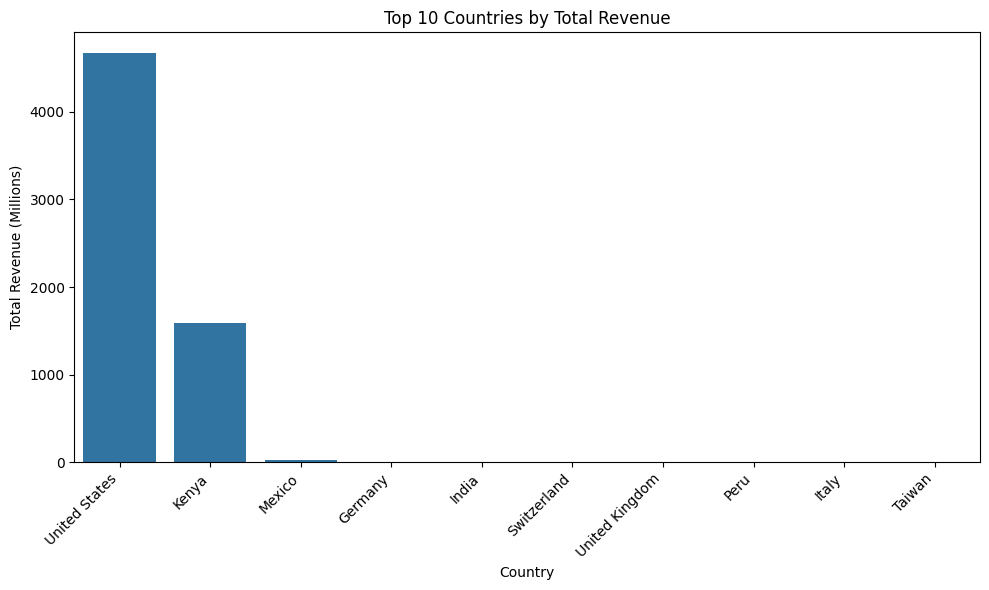

In [6]:
# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='total_revenue', data=df_1)
plt.title('Top 10 Countries by Total Revenue')
plt.xlabel('Country')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 도시 별 총 거래 수 및 수익 분석

In [7]:
# SQL 쿼리
query = """
SELECT
    geoNetwork.city,
    COUNT(DISTINCT fullVisitorId) AS total_users,
    SUM(totals.transactions) AS total_transactions,
    SUM(totals.totalTransactionRevenue) / 1000000 AS total_revenue
FROM
    `bigquery-public-data`.`google_analytics_sample`.`ga_sessions_20160801`
WHERE
    geoNetwork.country = 'United States' AND geoNetwork.city != '(not set)'
GROUP BY
    geoNetwork.city
ORDER BY
    total_revenue DESC
LIMIT 20;
"""

# 쿼리 실행 및 결과 DataFrame으로 저장
df_2 = client.query(query).to_dataframe()

<ipython-input-8-1dff68ee8f92>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='total_transactions', data=df_2, palette='viridis')
<ipython-input-8-1dff68ee8f92>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='total_revenue', data=df_2, palette='mako')


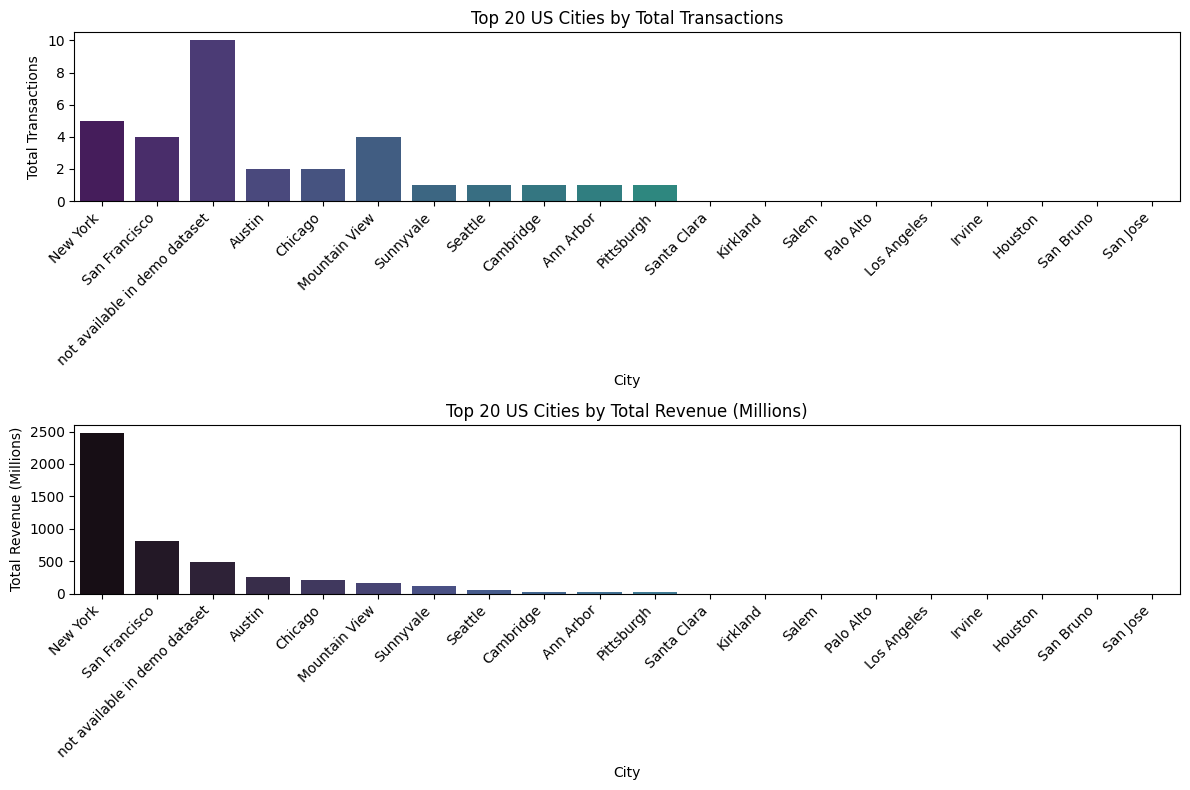

In [8]:
# 시각화
plt.figure(figsize=(12, 8))

# 총 거래 수 시각화
plt.subplot(2, 1, 1)
sns.barplot(x='city', y='total_transactions', data=df_2, palette='viridis')
plt.title('Top 20 US Cities by Total Transactions')
plt.xlabel('City')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 총 수익 시각화
plt.subplot(2, 1, 2)
sns.barplot(x='city', y='total_revenue', data=df_2, palette='mako')
plt.title('Top 20 US Cities by Total Revenue (Millions)')
plt.xlabel('City')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


In [9]:
# 추가적으로 테이블 형태로 결과 확인
print("\nTop 20 US Cities by Transactions and Revenue:")
print(df_2)


Top 20 US Cities by Transactions and Revenue:
                             city  total_users  total_transactions  \
0                        New York           66                   5   
1                   San Francisco           61                   4   
2   not available in demo dataset          374                  10   
3                          Austin           10                   2   
4                         Chicago           16                   2   
5                   Mountain View          156                   4   
6                       Sunnyvale           34                   1   
7                         Seattle            8                   1   
8                       Cambridge            9                   1   
9                       Ann Arbor           15                   1   
10                     Pittsburgh            8                   1   
11                    Santa Clara            9                <NA>   
12                       Kirkland          

# 추출 파일 input

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# 파일 경로
file_path = "drive/MyDrive/Colab Notebooks/Final Project/20160801~07_add_date_col.csv"

# 데이터프레임으로 로드
# df__1 = pd.read_csv(file_path)

In [12]:
# 기본적인 EDA
print(df__1.head())
print(df__1.describe())
print(df__1.info())

   fullVisitorId channelGrouping  visitNumber      date  hits  pageviews  \
0   8.658762e+18  Organic Search            1  20160806     2        2.0   
1   8.658762e+18  Organic Search            1  20160806     2        2.0   
2   8.658762e+18  Organic Search            1  20160806     2        2.0   
3   8.658762e+18  Organic Search            1  20160806     2        2.0   
4   8.658762e+18  Organic Search            1  20160806     2        2.0   

   timeOnSite  newVisits  transactionRevenue  transactions  ...  step  \
0      1586.0        1.0                 NaN           NaN  ...     1   
1      1586.0        1.0                 NaN           NaN  ...     1   
2      1586.0        1.0                 NaN           NaN  ...     1   
3      1586.0        1.0                 NaN           NaN  ...     1   
4      1586.0        1.0                 NaN           NaN  ...     1   

   socialNetwork hasSocialSourceReferral contentGroup1 previousContentGroup1  \
0      (not set)        

In [14]:
# 상위 20개 도시 선택
top_20_transactions = df__1.nlargest(20, 'transactions')  # 'transactions' 컬럼 기준 상위 20개
top_20_revenue = df__1.nlargest(20, 'totalTransactionRevenue')

# print(top_20_transactions)

<ipython-input-15-18b44121365a>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='transactions', data=df__1, palette='viridis')
<ipython-input-15-18b44121365a>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='city', y='totalTransactionRevenue', data=df__1, palette='mako')


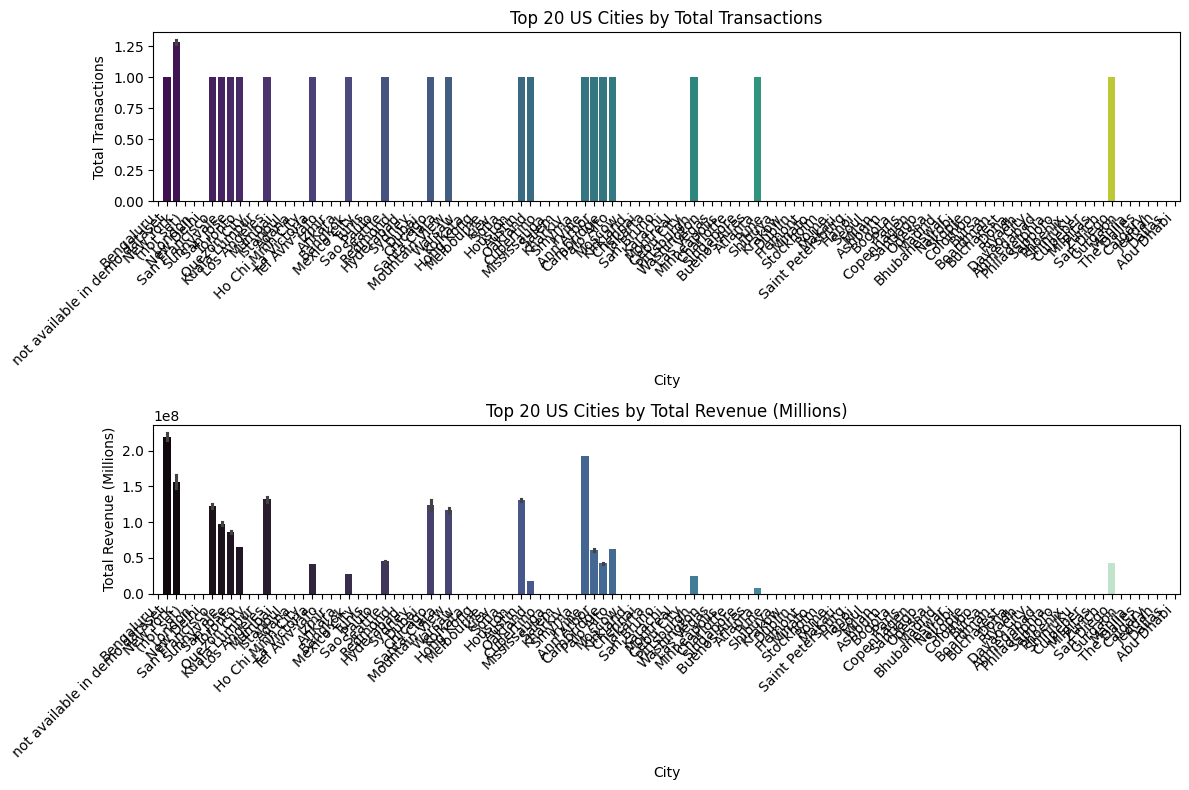

In [15]:
# 시각화
plt.figure(figsize=(12, 8))

# 총 거래 수 시각화
plt.subplot(2, 1, 1)
sns.barplot(x='city', y='transactions', data=df__1, palette='viridis')
plt.title('Top 20 US Cities by Total Transactions')
plt.xlabel('City')
plt.ylabel('Total Transactions')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# 총 수익 시각화
plt.subplot(2, 1, 2)
sns.barplot(x='city', y='totalTransactionRevenue', data=df__1, palette='mako')
plt.title('Top 20 US Cities by Total Revenue (Millions)')
plt.xlabel('City')
plt.ylabel('Total Revenue (Millions)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

In [16]:
# 추가적으로 테이블 형태로 결과 확인
print("\nTop 20 US Cities by Transactions and Revenue:")
print(df__1)


Top 20 US Cities by Transactions and Revenue:
        fullVisitorId channelGrouping  visitNumber      date  hits  pageviews  \
0        8.658762e+18  Organic Search            1  20160806     2        2.0   
1        8.658762e+18  Organic Search            1  20160806     2        2.0   
2        8.658762e+18  Organic Search            1  20160806     2        2.0   
3        8.658762e+18  Organic Search            1  20160806     2        2.0   
4        8.658762e+18  Organic Search            1  20160806     2        2.0   
...               ...             ...          ...       ...   ...        ...   
792482   3.150173e+17          Direct            7  20160804   197      131.0   
792483   3.150173e+17          Direct            7  20160804   197      131.0   
792484   3.150173e+17          Direct            7  20160804   197      131.0   
792485   3.150173e+17          Direct            7  20160804   197      131.0   
792486   3.150173e+17          Direct            7  20160804  

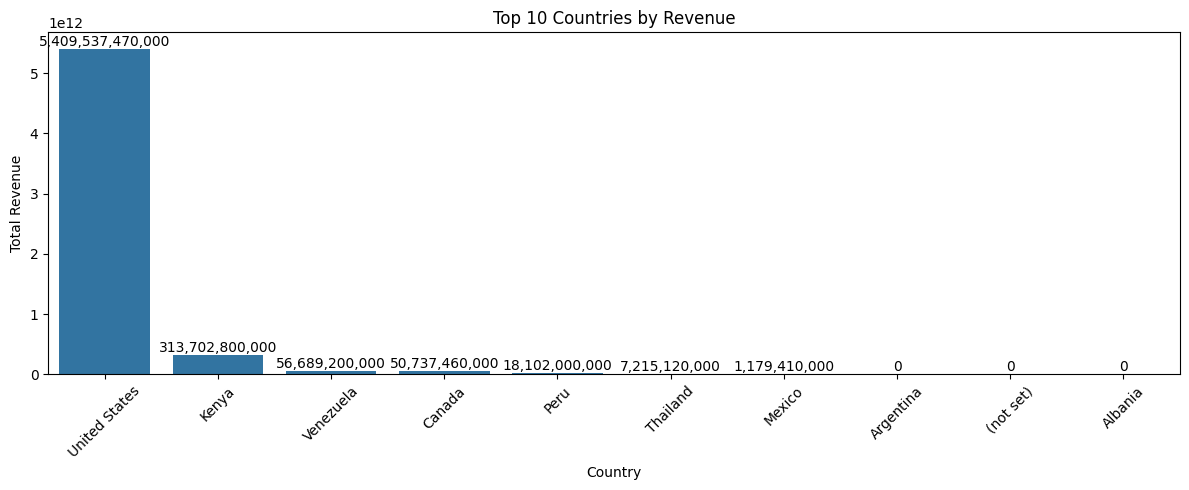

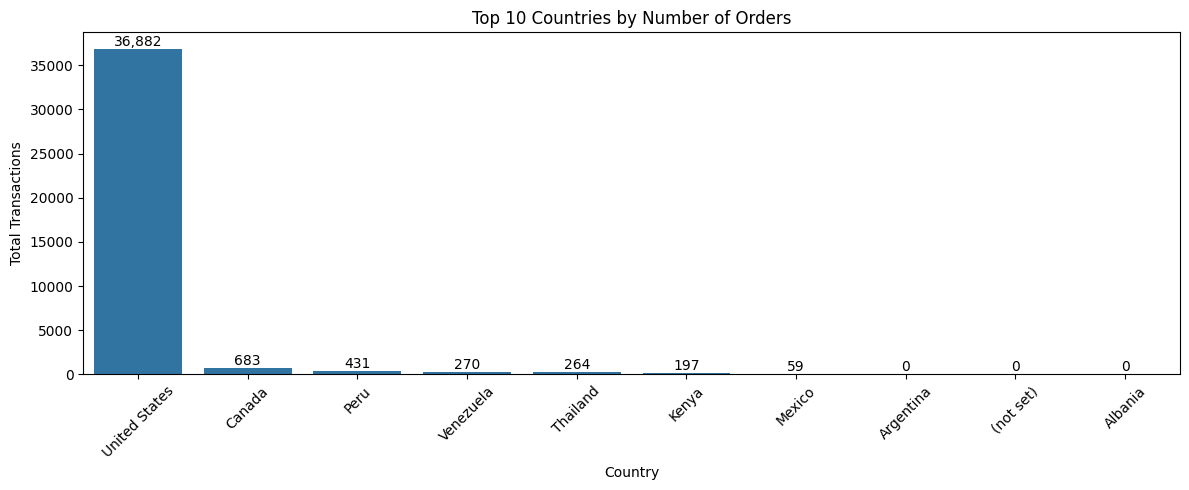

In [21]:
# 국가별 매출 (총 Revenue)
revenue_by_country = df__1.groupby('country')['totalTransactionRevenue'].sum().sort_values(ascending=False)

# 국가별 주문량 (Transaction 수)
orders_by_country = df__1.groupby('country')['transactions'].sum().sort_values(ascending=False)

# 국가별 매출 시각화 (상위 10개 국가)
plt.figure(figsize=(12, 5))
sns.barplot(x=revenue_by_country.head(10).index, y=revenue_by_country.head(10).values)
plt.title("Top 10 Countries by Revenue")
plt.xlabel("Country")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)

# 각 바 위에 값 표시
for i, val in enumerate(revenue_by_country.head(10).values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 국가별 주문량 시각화 (상위 10개 국가)
plt.figure(figsize=(12, 5))
sns.barplot(x=orders_by_country.head(10).index, y=orders_by_country.head(10).values)
plt.title("Top 10 Countries by Number of Orders")
plt.xlabel("Country")
plt.ylabel("Total Transactions")
plt.xticks(rotation=45)

# 각 바 위에 값 표시
for i, val in enumerate(orders_by_country.head(10).values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

# 미국 기준, 도시별 거래 수 및 총 수익

<ipython-input-23-4ffdc2931230>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_by_transactions.index, y=top_cities_by_transactions['transactions'], palette='viridis')


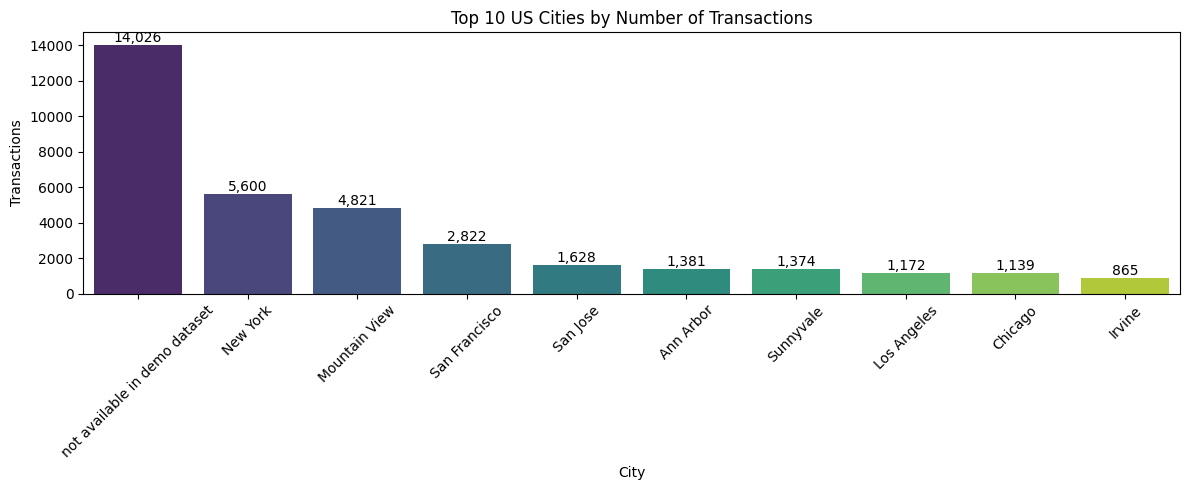

<ipython-input-23-4ffdc2931230>:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cities_by_revenue.index, y=top_cities_by_revenue['totalTransactionRevenue'], palette='viridis')


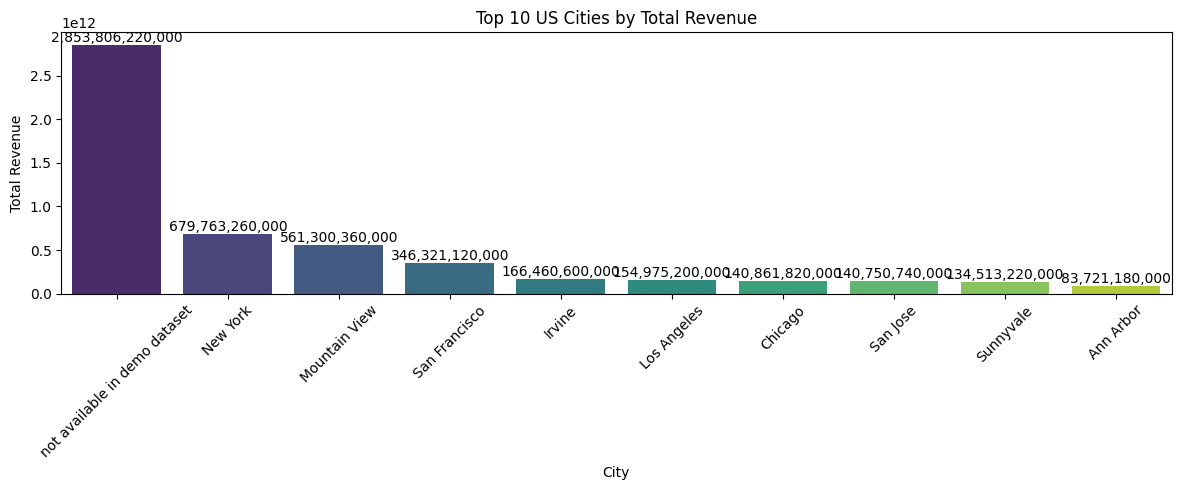

In [23]:
# 미국 데이터 필터링
us_df = df__1[df__1['country'] == 'United States']

# 도시별 거래 수 및 수익 집계
city_grouped = us_df.groupby('city')[['transactions', 'totalTransactionRevenue']].sum()

# 거래 수 기준 상위 10개 도시 정렬
top_cities_by_transactions = city_grouped.sort_values(by='transactions', ascending=False).head(10)

# 수익 기준 상위 10개 도시 정렬
top_cities_by_revenue = city_grouped.sort_values(by='totalTransactionRevenue', ascending=False).head(10)

# 거래 수 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cities_by_transactions.index, y=top_cities_by_transactions['transactions'], palette='viridis')
plt.title("Top 10 US Cities by Number of Transactions")
plt.xlabel("City")
plt.ylabel("Transactions")
plt.xticks(rotation=45)
for i, val in enumerate(top_cities_by_transactions['transactions']):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 총 수익 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=top_cities_by_revenue.index, y=top_cities_by_revenue['totalTransactionRevenue'], palette='viridis')
plt.title("Top 10 US Cities by Total Revenue")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
for i, val in enumerate(top_cities_by_revenue['totalTransactionRevenue']):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 사용자 수 기반 지리분석

### 전체 국가 기준

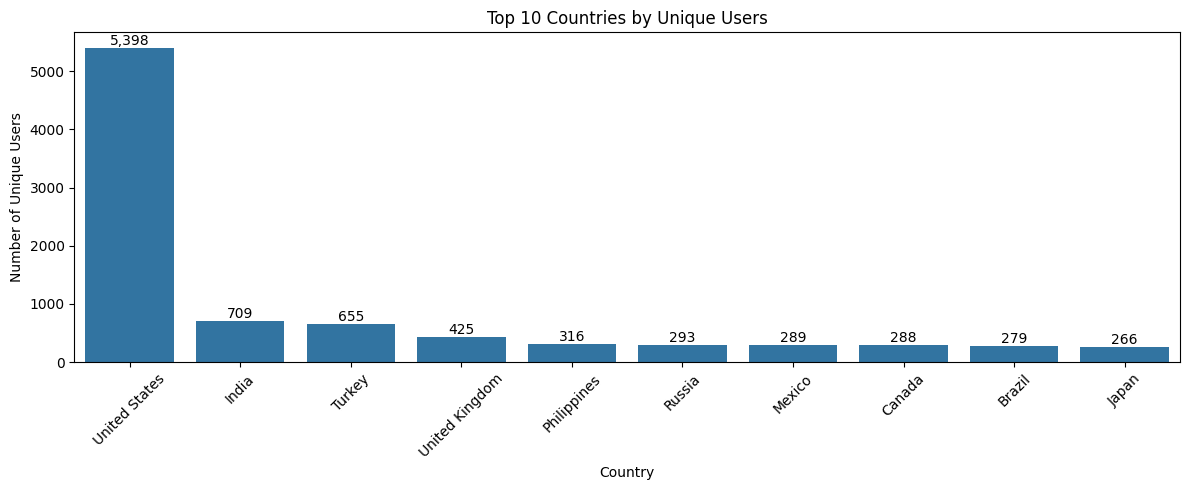

In [24]:
# 국가별 고유 사용자 수
user_count_by_country = df__1.groupby('country')['fullVisitorId'].nunique().sort_values(ascending=False)

# 상위 10개 국가 시각화
plt.figure(figsize=(12, 5))
sns.barplot(x=user_count_by_country.head(10).index, y=user_count_by_country.head(10).values)
plt.title("Top 10 Countries by Unique Users")
plt.xlabel("Country")
plt.ylabel("Number of Unique Users")
plt.xticks(rotation=45)
for i, val in enumerate(user_count_by_country.head(10).values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 미국 기준

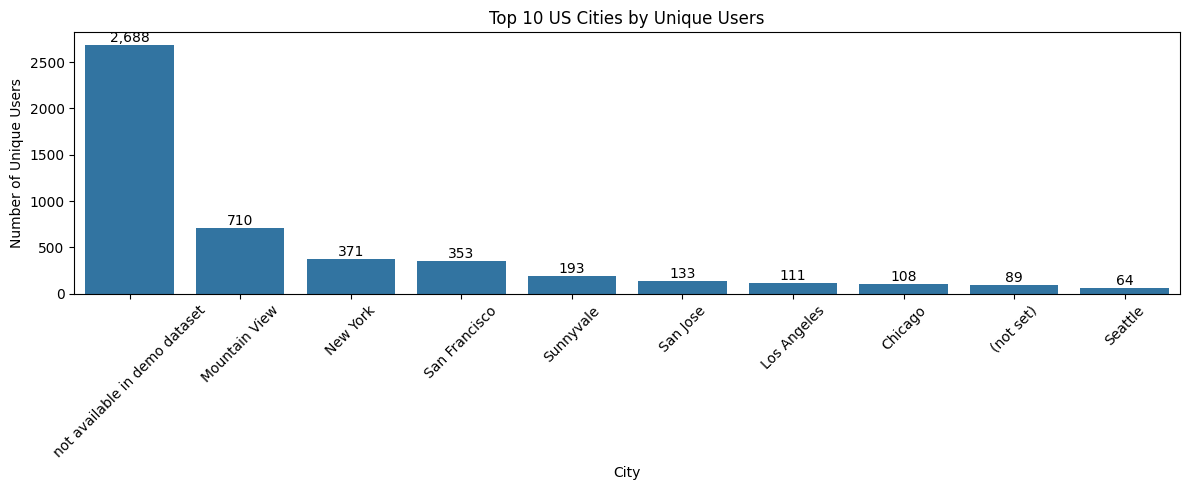

In [26]:
us_df = df__1[df__1['country'] == 'United States']
user_count_by_city = us_df.groupby('city')['fullVisitorId'].nunique().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=user_count_by_city.head(10).index, y=user_count_by_city.head(10).values)
plt.title("Top 10 US Cities by Unique Users")
plt.xlabel("City")
plt.ylabel("Number of Unique Users")
plt.xticks(rotation=45)
for i, val in enumerate(user_count_by_city.head(10).values):
    plt.text(i, val, f'{int(val):,}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 국가별 신규 방문자

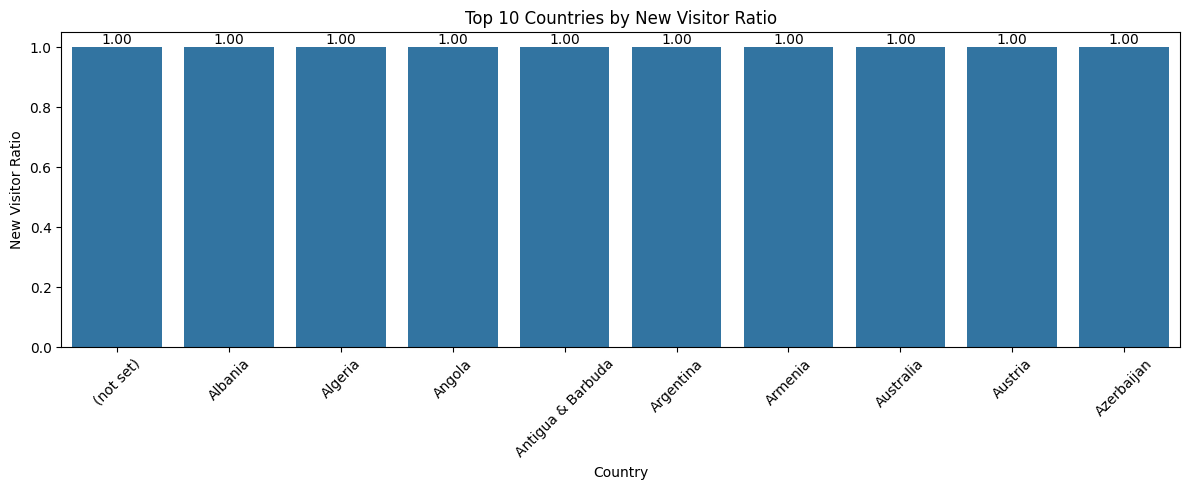

In [27]:
# 국가별 신규 방문자 비율 (평균)
new_visitor_ratio_by_country = df__1.groupby('country')['newVisits'].mean().sort_values(ascending=False)

# 시각화: 상위 10개 국가
plt.figure(figsize=(12, 5))
sns.barplot(x=new_visitor_ratio_by_country.head(10).index, y=new_visitor_ratio_by_country.head(10).values)
plt.title("Top 10 Countries by New Visitor Ratio")
plt.xlabel("Country")
plt.ylabel("New Visitor Ratio")
plt.xticks(rotation=45)
for i, val in enumerate(new_visitor_ratio_by_country.head(10).values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 국가별 사용자당 평균 수익 (ARPU: Average Revenue per User)

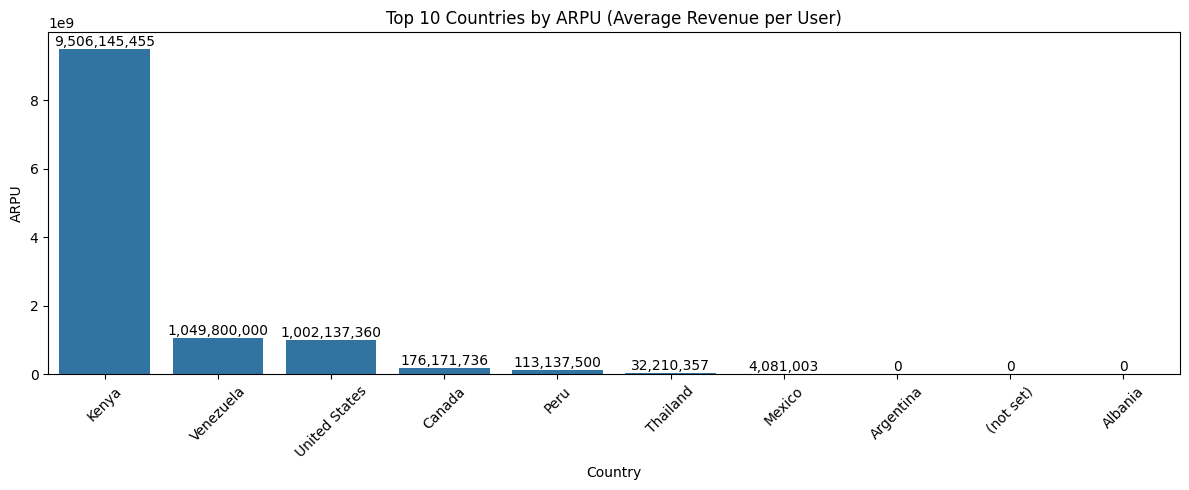

In [28]:
arpu_by_country = df__1.groupby('country').agg({
    'totalTransactionRevenue': 'sum',
    'fullVisitorId': pd.Series.nunique
}).rename(columns={'fullVisitorId': 'unique_users'})

arpu_by_country['ARPU'] = arpu_by_country['totalTransactionRevenue'] / arpu_by_country['unique_users']
arpu_by_country = arpu_by_country.sort_values('ARPU', ascending=False)

# 시각화: 상위 10개
plt.figure(figsize=(12, 5))
sns.barplot(x=arpu_by_country.head(10).index, y=arpu_by_country['ARPU'].head(10))
plt.title("Top 10 Countries by ARPU (Average Revenue per User)")
plt.xlabel("Country")
plt.ylabel("ARPU")
plt.xticks(rotation=45)
for i, val in enumerate(arpu_by_country['ARPU'].head(10).values):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 미국 기준/ 신규 방문자, ARPU

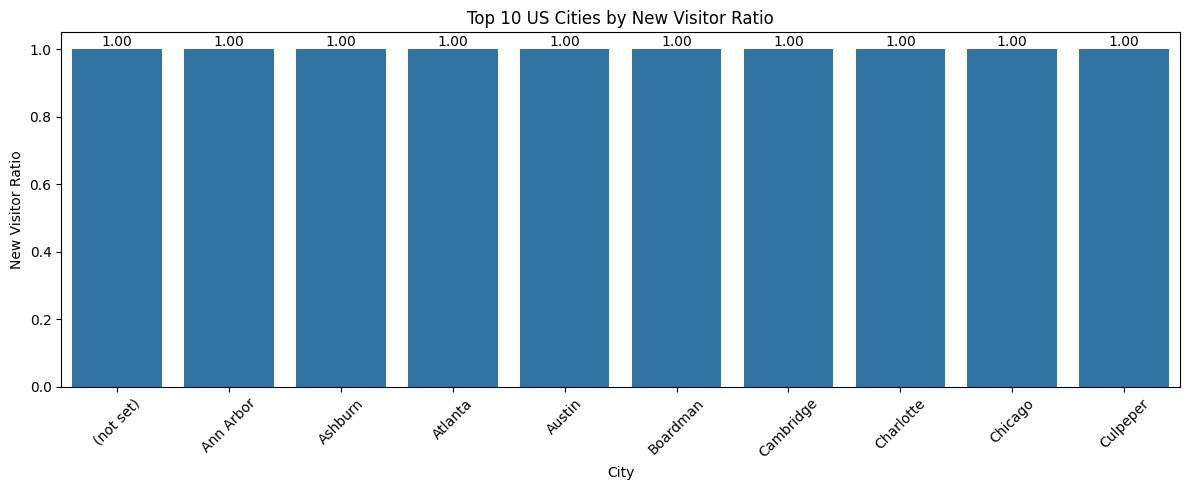

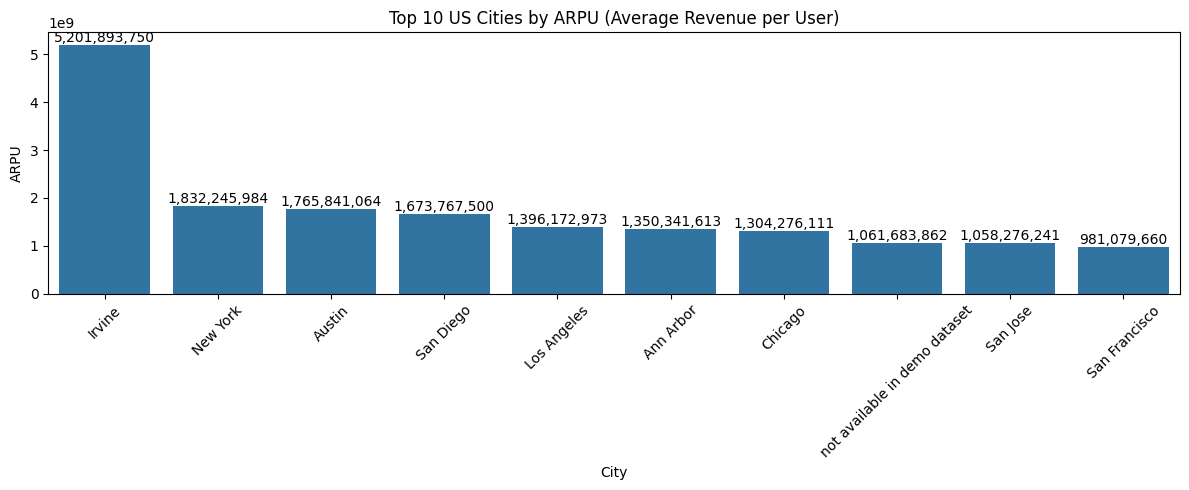

In [29]:
# 미국 필터링
us_df = df__1[df__1['country'] == 'United States']

# 도시별 신규 방문자 비율
new_visitor_ratio_by_city = us_df.groupby('city')['newVisits'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=new_visitor_ratio_by_city.head(10).index, y=new_visitor_ratio_by_city.head(10).values)
plt.title("Top 10 US Cities by New Visitor Ratio")
plt.xlabel("City")
plt.ylabel("New Visitor Ratio")
plt.xticks(rotation=45)
for i, val in enumerate(new_visitor_ratio_by_city.head(10).values):
    plt.text(i, val, f'{val:.2f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

# 도시별 ARPU
arpu_by_city = us_df.groupby('city').agg({
    'totalTransactionRevenue': 'sum',
    'fullVisitorId': pd.Series.nunique
}).rename(columns={'fullVisitorId': 'unique_users'})

arpu_by_city['ARPU'] = arpu_by_city['totalTransactionRevenue'] / arpu_by_city['unique_users']
arpu_by_city = arpu_by_city.sort_values('ARPU', ascending=False)

plt.figure(figsize=(12, 5))
sns.barplot(x=arpu_by_city.head(10).index, y=arpu_by_city['ARPU'].head(10))
plt.title("Top 10 US Cities by ARPU (Average Revenue per User)")
plt.xlabel("City")
plt.ylabel("ARPU")
plt.xticks(rotation=45)
for i, val in enumerate(arpu_by_city['ARPU'].head(10).values):
    plt.text(i, val, f'{val:,.0f}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 국가별 거래 전환율

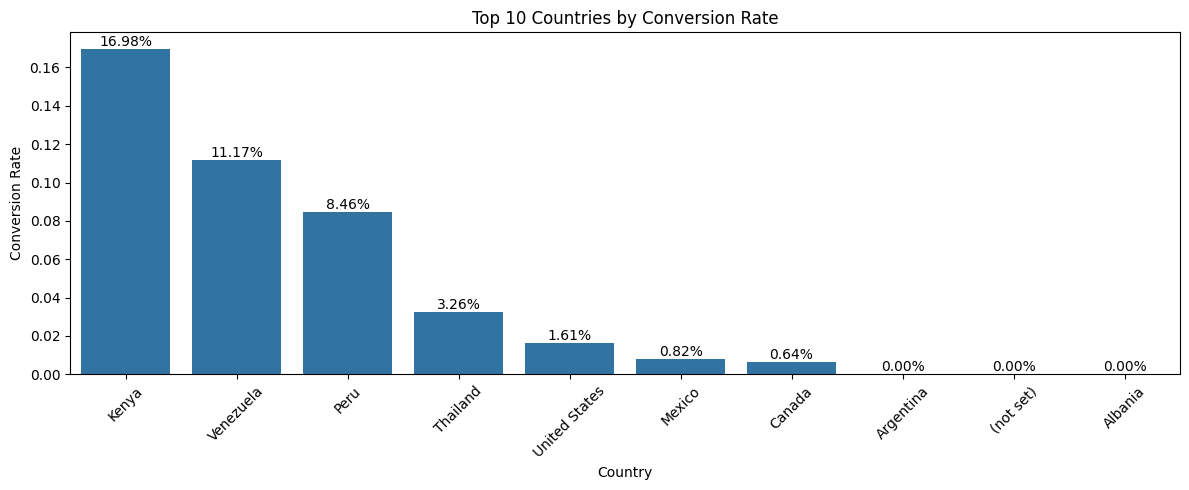

In [32]:
# 국가별 거래 전환율 계산
conversion_by_country = df__1.groupby('country').agg({
    'transactions': 'sum',
    'visitNumber': 'sum'
})

conversion_by_country['conversion_rate'] = conversion_by_country['transactions'] / conversion_by_country['visitNumber']
conversion_by_country = conversion_by_country.sort_values(by='conversion_rate', ascending=False)

# 시각화 (상위 10개 국가)
plt.figure(figsize=(12, 5))
sns.barplot(x=conversion_by_country.head(10).index, y=conversion_by_country['conversion_rate'].head(10))
plt.title("Top 10 Countries by Conversion Rate")
plt.xlabel("Country")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
for i, val in enumerate(conversion_by_country['conversion_rate'].head(10).values):
    plt.text(i, val, f'{val:.2%}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 미국 기준/ 도시별 거래 전환율

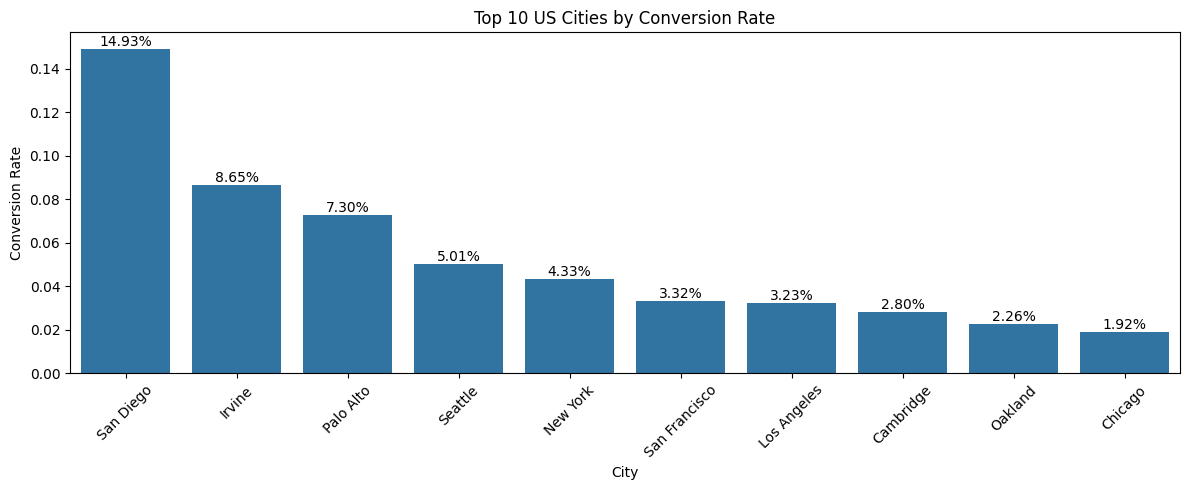

In [33]:
# 미국 데이터 필터링
us_df = df__1[df__1['country'] == 'United States']

# 도시별 거래 전환율 계산
conversion_by_city = us_df.groupby('city').agg({
    'transactions': 'sum',
    'visitNumber': 'sum'
})
conversion_by_city['conversion_rate'] = conversion_by_city['transactions'] / conversion_by_city['visitNumber']
conversion_by_city = conversion_by_city.sort_values(by='conversion_rate', ascending=False)

# 시각화 (상위 10개 도시)
plt.figure(figsize=(12, 5))
sns.barplot(x=conversion_by_city.head(10).index, y=conversion_by_city['conversion_rate'].head(10))
plt.title("Top 10 US Cities by Conversion Rate")
plt.xlabel("City")
plt.ylabel("Conversion Rate")
plt.xticks(rotation=45)
for i, val in enumerate(conversion_by_city['conversion_rate'].head(10).values):
    plt.text(i, val, f'{val:.2%}', ha='center', va='bottom', fontsize=10)
plt.tight_layout()
plt.show()

### 국가별 구매 카테고리량 비교

In [34]:
# 국가별 + 카테고리별 거래 수 합계
category_by_country = df__1.groupby(['country', 'v2ProductCategory'])['transactions'].sum().reset_index()

# 피벗 테이블 형식으로 변환 (행: country, 열: v2ProductCategory, 값: 거래 수)
category_pivot = category_by_country.pivot(index='country', columns='v2ProductCategory', values='transactions').fillna(0)

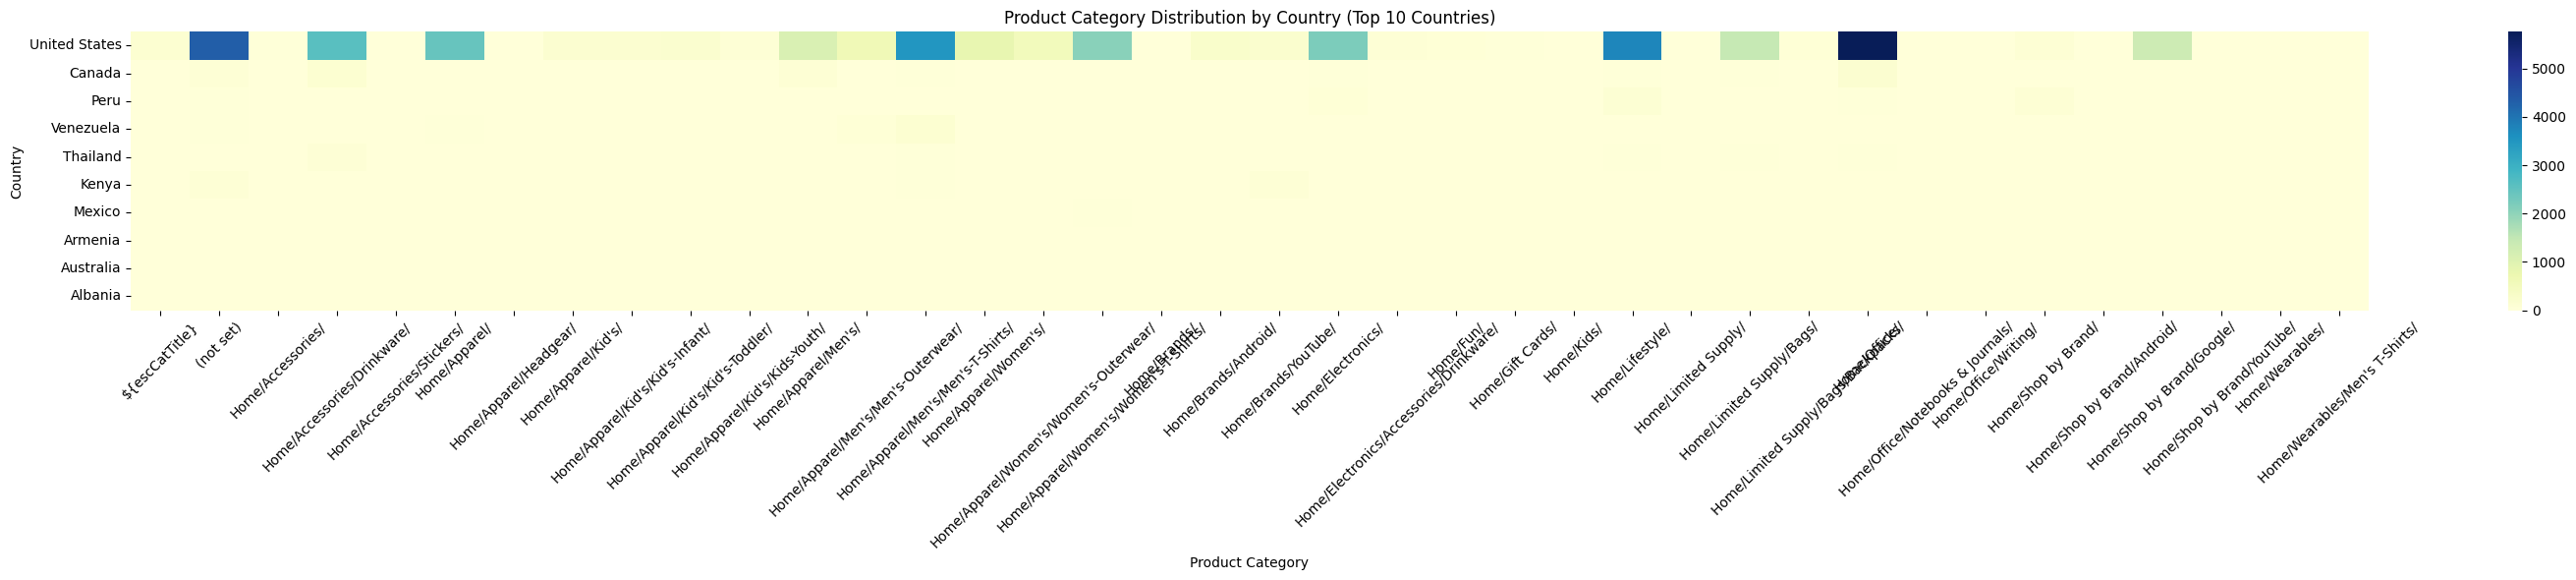

In [36]:
# 거래 수가 많은 상위 10개 국가 추출
top_countries = category_pivot.sum(axis=1).sort_values(ascending=False).head(10).index

# 해당 국가만 추출
top_category_pivot = category_pivot.loc[top_countries]

# 히트맵 시각화
plt.figure(figsize=(30, 6))
sns.heatmap(top_category_pivot, annot=False, cmap='YlGnBu')
plt.title("Product Category Distribution by Country (Top 10 Countries)")
plt.xlabel("Product Category")
plt.ylabel("Country")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 미국 기준/ 구매 카테고리량 비교

In [37]:
# 미국 데이터 필터링
us_df = df__1[df__1['country'] == 'United States']

# 도시 + 카테고리별 거래 수 합계
category_by_city = us_df.groupby(['city', 'v2ProductCategory'])['transactions'].sum().reset_index()

# 피벗: 행=city, 열=category, 값=transactions
category_city_pivot = category_by_city.pivot(index='city', columns='v2ProductCategory', values='transactions').fillna(0)

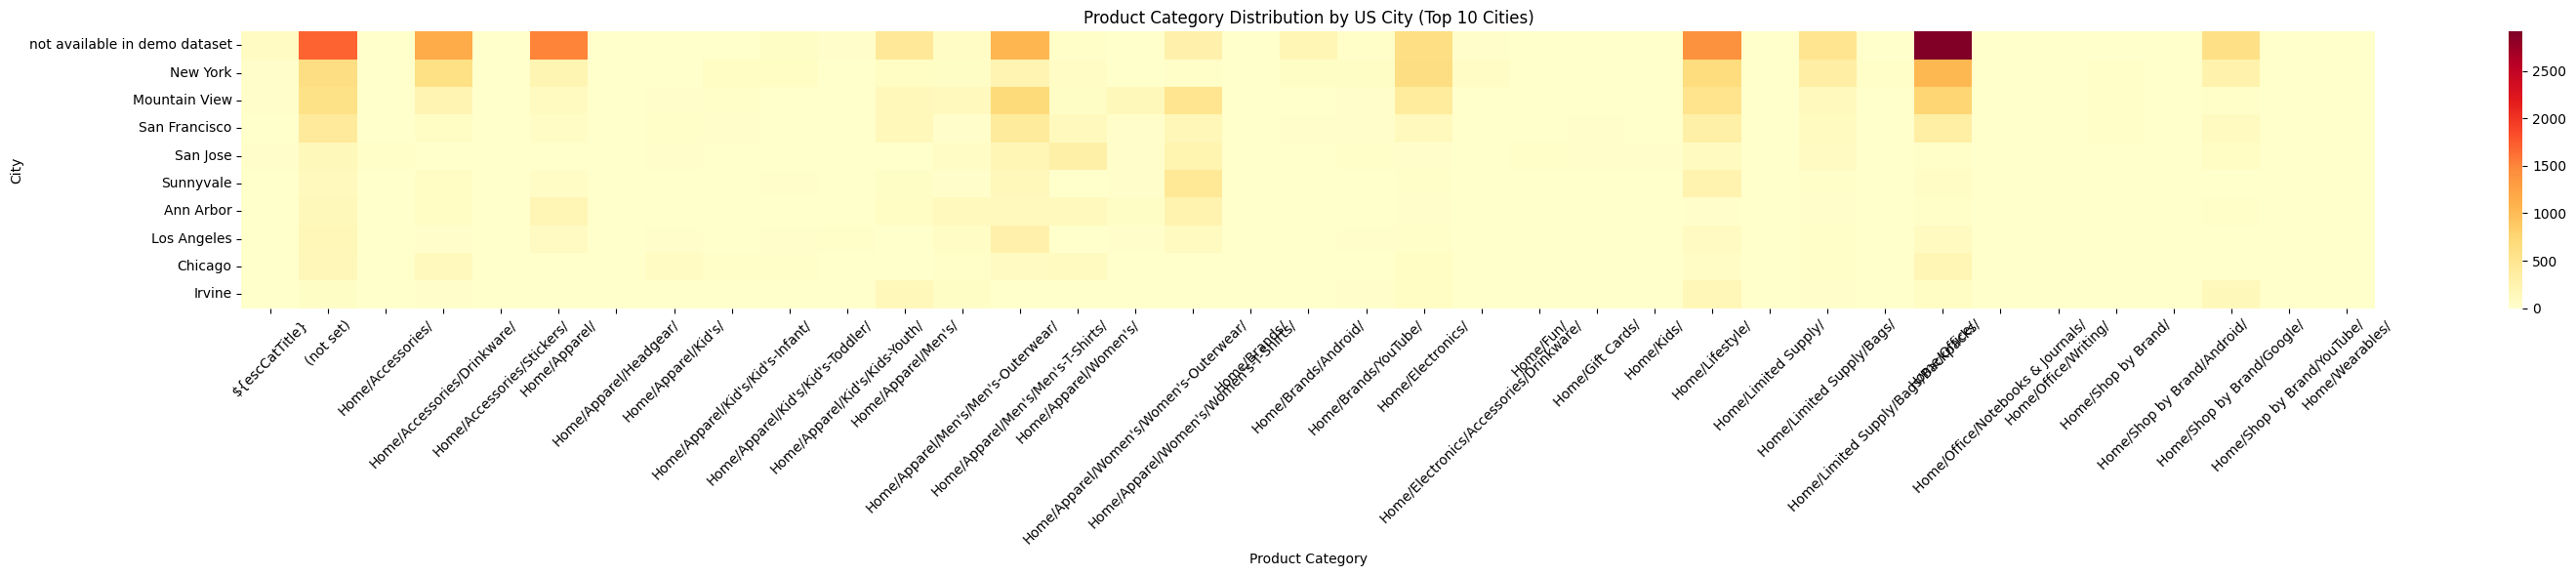

In [40]:
# 상위 10개 도시만 선택
top_cities = category_city_pivot.sum(axis=1).sort_values(ascending=False).head(10).index
top_category_city = category_city_pivot.loc[top_cities]

# 히트맵 시각화
plt.figure(figsize=(30, 6))
sns.heatmap(top_category_city, cmap='YlOrRd', annot=False)
plt.title("Product Category Distribution by US City (Top 10 Cities)")
plt.xlabel("Product Category")
plt.ylabel("City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [5]:
import pandas as pd

# 업로드된 히트 단위 데이터 로딩
df = pd.read_csv(file_path)

# 기본적으로 필요한 컬럼이 있는지 확인
df.columns

# 필요한 컬럼만 추출
selected_columns = [
    "fullVisitorId", "visitStartTime", "pageviews", "timeOnSite", "transactions",
    "transactionRevenue", "productRevenue", "pagePath", "deviceCategory", "browser",
    "operatingSystem"
]
df_hit = df[selected_columns].copy()

# 세션 단위로 집계
session_df = df_hit.groupby(["fullVisitorId", "visitStartTime"]).agg({
    "pageviews": "sum",
    "timeOnSite": "max",
    "transactions": "max",
    "transactionRevenue": "sum",
    "productRevenue": "sum",
    "pagePath": lambda x: " > ".join(x.dropna().astype(str).tolist()),
    "deviceCategory": "first",
    "browser": "first",
    "operatingSystem": "first"
}).reset_index()

# 전환 여부 파생 변수 생성
session_df["converted"] = session_df["transactions"].fillna(0).apply(lambda x: 1 if x >= 1 else 0)

# pagePath 흐름 단계 수 (화살표 개수 + 1)
session_df["steps"] = session_df["pagePath"].str.count(">") + 1

# 사용자에게 데이터프레임 표시
session_df.head()

<ipython-input-5-eb7c5b1e2ba5>:4: DtypeWarning: Columns (47,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


KeyError: "['visitStartTime'] not in index"